<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/simple_donn%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
url = 'https://raw.githubusercontent.com/moncoachdata/DATA_DEEP_LEARNING/master/fake_reg.csv'
df = pd.read_csv(url)

In [81]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


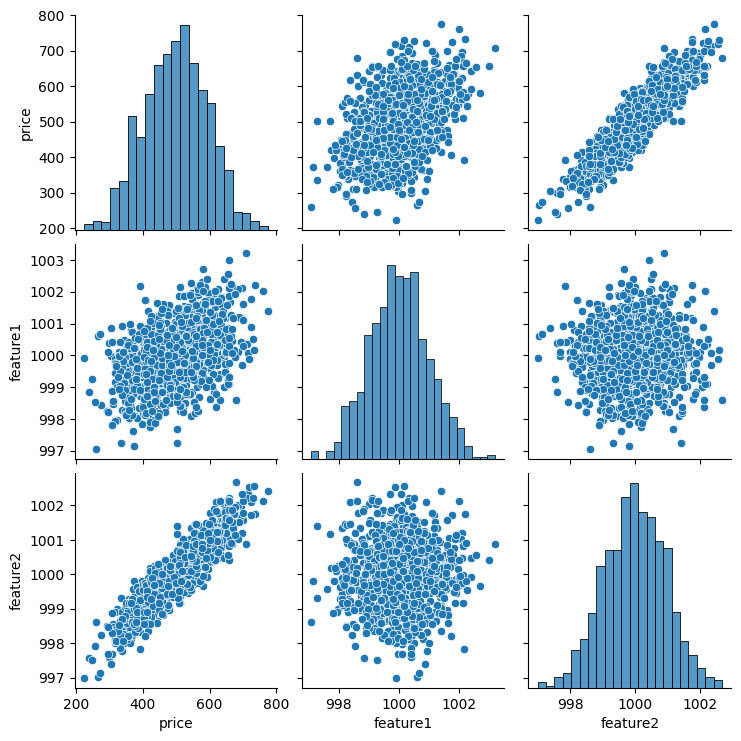

In [82]:
sns.pairplot(df);

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df[['feature1','feature2']].values

y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
X_train.shape

(700, 2)

In [86]:
X_test.shape

(300, 2)

In [87]:
y_train.shape

(700,)

In [88]:
y_test.shape

(300,)

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [91]:
scaler.fit(X_train)

MinMaxScaler()

In [92]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
import tensorflow as tf

In [94]:
from tensorflow.keras.models import Sequential

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [96]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [97]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256260.9688
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256004.2188 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254477.7344 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261055.7344 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258089.4219 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246846.4062 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259042.2812 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259749.2031
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257347.7969 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251225.9062 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261347.8750 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252042.4062 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255668.2188 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25

In [98]:
model.history.history

{'loss': [256709.484375,
  256610.90625,
  256502.515625,
  256379.5625,
  256245.421875,
  256103.453125,
  255952.953125,
  255787.90625,
  255607.078125,
  255409.03125,
  255194.8125,
  254953.6875,
  254685.421875,
  254388.578125,
  254061.71875,
  253700.109375,
  253305.078125,
  252871.84375,
  252397.890625,
  251883.46875,
  251324.75,
  250722.71875,
  250069.375,
  249359.46875,
  248597.765625,
  247777.390625,
  246899.59375,
  245960.390625,
  244949.640625,
  243881.171875,
  242741.125,
  241521.390625,
  240229.1875,
  238856.140625,
  237406.265625,
  235871.515625,
  234246.625,
  232537.640625,
  230738.375,
  228846.15625,
  226848.9375,
  224752.59375,
  222553.59375,
  220258.609375,
  217864.34375,
  215361.296875,
  212732.921875,
  210004.75,
  207164.15625,
  204209.9375,
  201132.984375,
  197943.65625,
  194660.3125,
  191244.609375,
  187691.546875,
  184058.015625,
  180311.34375,
  176437.34375,
  172433.59375,
  168296.453125,
  164072.421875,
  15975

In [99]:
loss = model.history.history['loss']

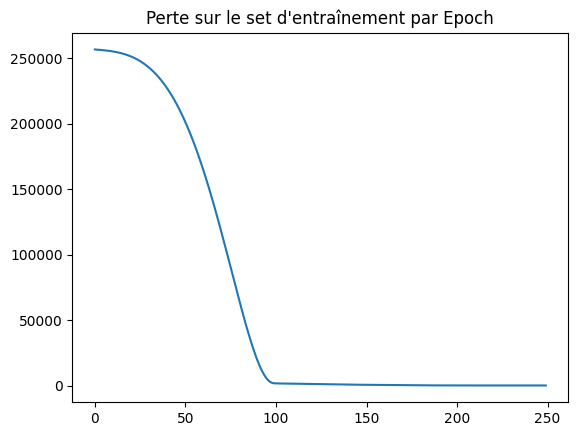

In [100]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Perte sur le set d'entraînement par Epoch");

In [101]:
model.metrics_names

['loss']

In [102]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [103]:
training_score

24.94795799255371

In [104]:
test_score

27.374618530273438

In [105]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [106]:
test_predictions

array([[406.48434],
       [625.2476 ],
       [593.74817],
       [573.85394],
       [367.7976 ],
       [580.79456],
       [516.5807 ],
       [460.39856],
       [550.8175 ],
       [448.77734],
       [613.4642 ],
       [550.4017 ],
       [420.33295],
       [410.09094],
       [652.9345 ],
       [438.54752],
       [509.8257 ],
       [661.7915 ],
       [664.4119 ],
       [567.07837],
       [335.29495],
       [446.12643],
       [383.69696],
       [379.88388],
       [568.17487],
       [612.31055],
       [533.8961 ],
       [429.1009 ],
       [657.27344],
       [415.2667 ],
       [443.8891 ],
       [486.5103 ],
       [439.68137],
       [683.72894],
       [425.94803],
       [418.943  ],
       [503.267  ],
       [552.0055 ],
       [511.23376],
       [396.6022 ],
       [620.27094],
       [417.8274 ],
       [606.09875],
       [447.1958 ],
       [503.41306],
       [583.2417 ],
       [670.7543 ],
       [491.7679 ],
       [319.53482],
       [486.8182 ],


In [107]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [108]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [109]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [110]:
test_predictions

,0
0,406.484344
1,625.247620
2,593.748169
3,573.853943
4,367.797607
...,...
295,530.565247
296,516.911255
297,611.318176
298,418.140686


In [111]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [112]:
pred_df.columns = ['Test Y','Model Predictions']

In [113]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.484344
1,624.156198,625.247620
2,582.455066,593.748169
3,578.588606,573.853943
4,371.224104,367.797607
...,...,...
295,525.704657,530.565247
296,502.909473,516.911255
297,612.727910,611.318176
298,417.569725,418.140686


In [114]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

In [115]:
pred_df

,Test Y,Model Predictions,Error
0,402.296319,406.484344,-4.188026
1,624.156198,625.247620,-1.091421
2,582.455066,593.748169,-11.293103
3,578.588606,573.853943,4.734664
4,371.224104,367.797607,3.426496
...,...,...,...
295,525.704657,530.565247,-4.860590
296,502.909473,516.911255,-14.001782
297,612.727910,611.318176,1.409734
298,417.569725,418.140686,-0.570962


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

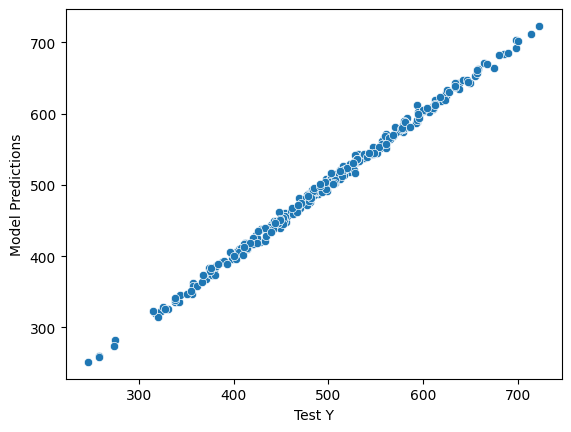

In [116]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

<ipython-input-117-12727d456eec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

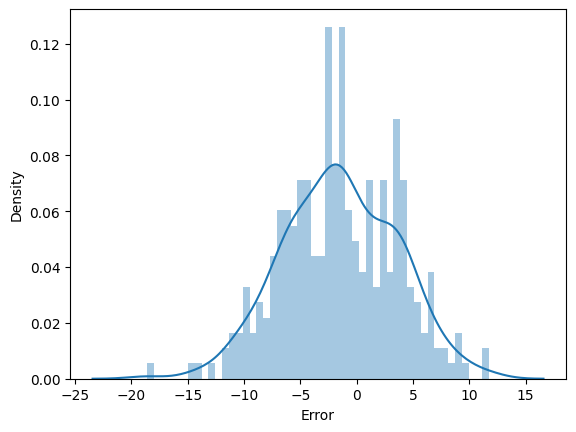

In [117]:
sns.distplot(pred_df['Error'],bins=50)

In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [119]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.246793116277451

In [120]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

27.37462038975973

In [121]:
test_score

27.374618530273438

In [122]:
test_score**0.5

5.23207592932991

In [123]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

Nouvelle donnée

In [124]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [125]:
new_gem = scaler.transform(new_gem)

In [126]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[420.98703]], dtype=float32)

Sauvegarde et chargement d'un modèle

In [127]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

In [128]:
model.save('my_model.h5')

In [129]:
later_model = load_model('my_model.h5', custom_objects={'mse': MeanSquaredError()})

In [130]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[420.98703]], dtype=float32)